In [2]:
import urllib.request
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
"""""
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")

"""""

'""\nimport subprocess\nimport sys\n\ndef install(package):\n    subprocess.check_call([sys.executable, "-m", "pip", "install", package])\n\ninstall("pandas")\n\n'

In [4]:
def download_file(url, filename=None):
    if filename is None:
        filename = os.path.basename(url)  # Extract filename from URL
    
    if os.path.exists(filename):
        print(f"File '{filename}' already exists. Skipping download.")
        filename = os.path.basename(url)  # Extract filename from URL
        return filename
    
    print(f"Downloading '{filename}'...")
    urllib.request.urlretrieve(url, filename)
    print("Download complete!")
    return filename

def unzip_file(zip_path, extract_to=None):
    if extract_to is None:
        extract_to = zip_path.replace(".zip", "")  # Extract to a folder with the same name

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted '{zip_path}' to '{extract_to}'.")
        return extract_to


In [5]:
# move to working directory
working_dir = "/Users/evan/MIT/c85/FP1"
os.chdir(working_dir)

In [7]:
filelist = os.listdir()
#df = pd.read_csv(filelist[0])  # Replace with your file name
data_file = "aggregated2020.csv"
#print(filelist)

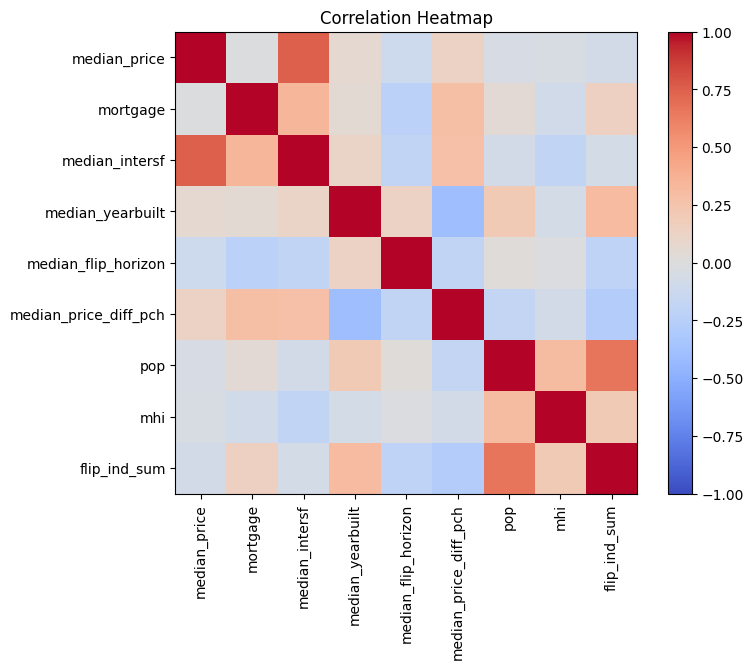

,median_price,mortgage,median_intersf,median_yearbuilt,median_flip_horizon,median_price_diff_pch,pop,mhi,flip_ind_sum
median_price,1.000000,-0.011062,0.748466,0.059915,-0.116833,0.125728,-0.048117,-0.042058,-0.073795
mortgage,-0.011062,1.000000,0.340650,0.054234,-0.232933,0.285133,0.039082,-0.085271,0.142523
median_intersf,0.748466,0.340650,1.000000,0.116221,-0.185351,0.275702,-0.070466,-0.194245,-0.064435
median_yearbuilt,0.059915,0.054234,0.116221,1.000000,0.125852,-0.391226,0.201438,-0.067473,0.309756
median_flip_horizon,-0.116833,-0.232933,-0.185351,0.125852,1.000000,-0.188223,0.016293,-0.023082,-0.209577
median_price_diff_pch,0.125728,0.285133,0.275702,-0.391226,-0.188223,1.000000,-0.179422,-0.070677,-0.280233
pop,-0.048117,0.039082,-0.070466,0.201438,0.016293,-0.179422,1.000000,0.302772,0.660121
mhi,-0.042058,-0.085271,-0.194245,-0.067473,-0.023082,-0.070677,0.302772,1.000000,0.195887
flip_ind_sum,-0.073795,0.142523,-0.064435,0.309756,-0.209577,-0.280233,0.660121,0.195887,1.000000


In [8]:
df = pd.read_csv("aggregated2020.csv")

cols_of_interest = [
    'median_price', 'mortgage', 'median_intersf', 'median_yearbuilt',
    'median_flip_horizon', 'median_price_diff_pch', 'pop', 'mhi', 'flip_ind_sum'
]

# Filter out any row with missing data in these columns to avoid errors
df_corr = df[cols_of_interest].dropna()

corr_matrix = df_corr.corr()

plt.figure(figsize=(8,6))
cax = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)
plt.xticks(range(len(cols_of_interest)), cols_of_interest, rotation=90)
plt.yticks(range(len(cols_of_interest)), cols_of_interest)
plt.title('Correlation Heatmap')
plt.show()

corr_matrix


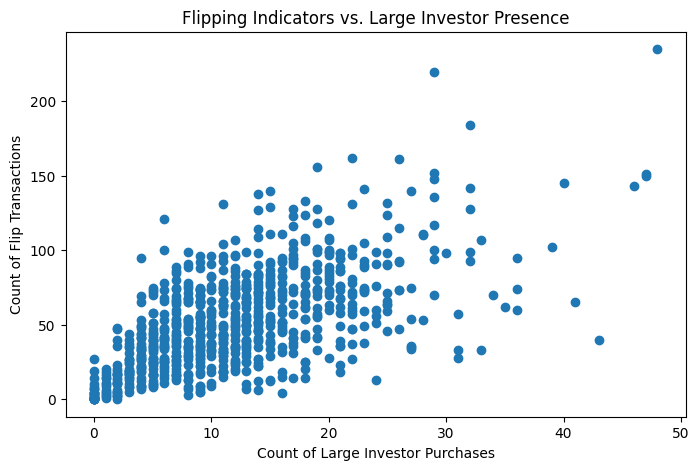

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(df['sum_large_investor'], df['flip_ind_sum'])
plt.title('Flipping Indicators vs. Large Investor Presence')
plt.xlabel('Count of Large Investor Purchases')
plt.ylabel('Count of Flip Transactions')
plt.show()


<Figure size 800x500 with 0 Axes>

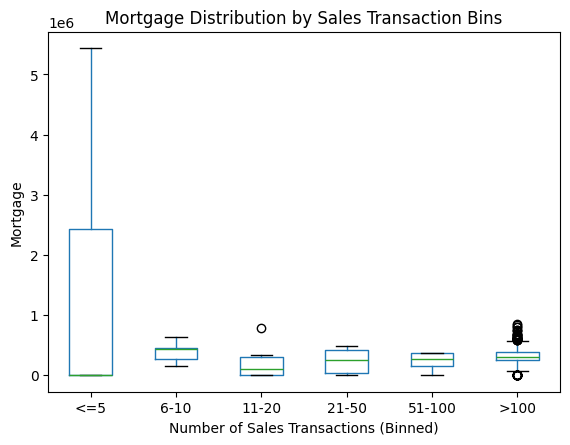

In [10]:
import numpy as np

# Example: create bins for num_sales_transactions
bins = [0, 5, 10, 20, 50, 100, df['num_sales_transactions'].max()]
labels = ['<=5','6-10','11-20','21-50','51-100','>100']
df['transaction_bins'] = pd.cut(df['num_sales_transactions'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
df.boxplot(column='mortgage', by='transaction_bins', grid=False)
plt.title('Mortgage Distribution by Sales Transaction Bins')
plt.suptitle('')
plt.xlabel('Number of Sales Transactions (Binned)')
plt.ylabel('Mortgage')
plt.show()

# (Optional) Remove the temporary column if desired
df.drop(columns='transaction_bins', inplace=True)


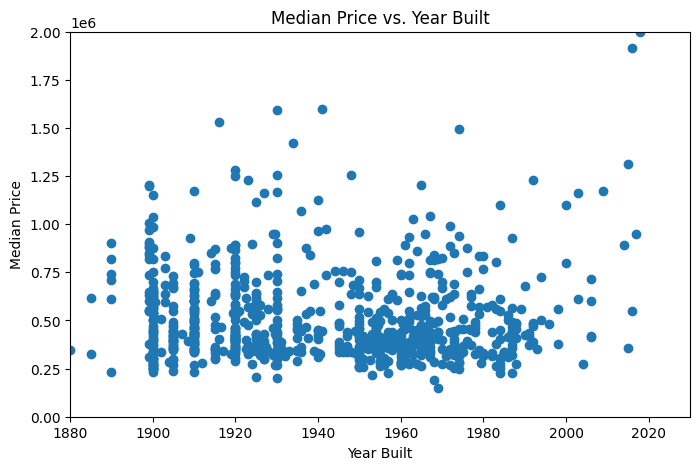

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(df['median_yearbuilt'], df['median_price'])
plt.title('Median Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Median Price')
plt.xlim([1880,2030])
plt.ylim([0,0.2e7])
plt.show()


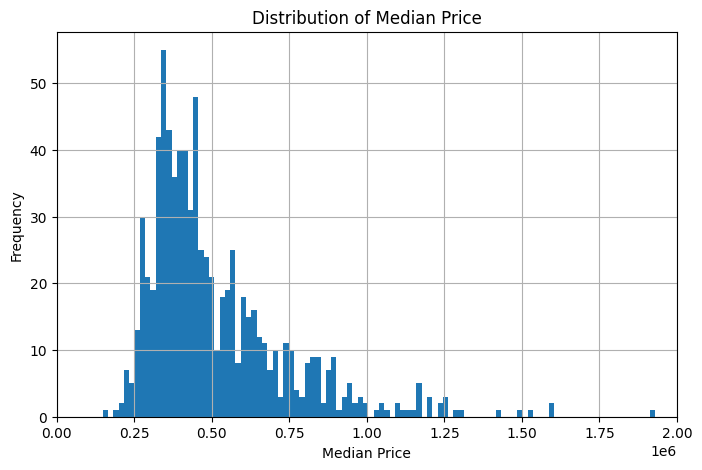

In [ ]:
plt.figure(figsize=(8, 5))
df['median_price'].hist(bins=5000)
plt.xlim([0,0.2e7])
plt.title('Distribution of Median Price')
plt.xlabel('Median Price')
plt.ylabel('Frequency')
#plt.yscale('log')
plt.show()